In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = 'darkgrid')

from fitter import Fitter, get_common_distributions

# Channel Width Analysis

In [4]:
tauraat = pd.read_csv('./data/tau_pos_dis.csv', converters={'site_no': str}, low_memory=False)

In [5]:
tau_pos_freq = tauraat['site_no'].value_counts()

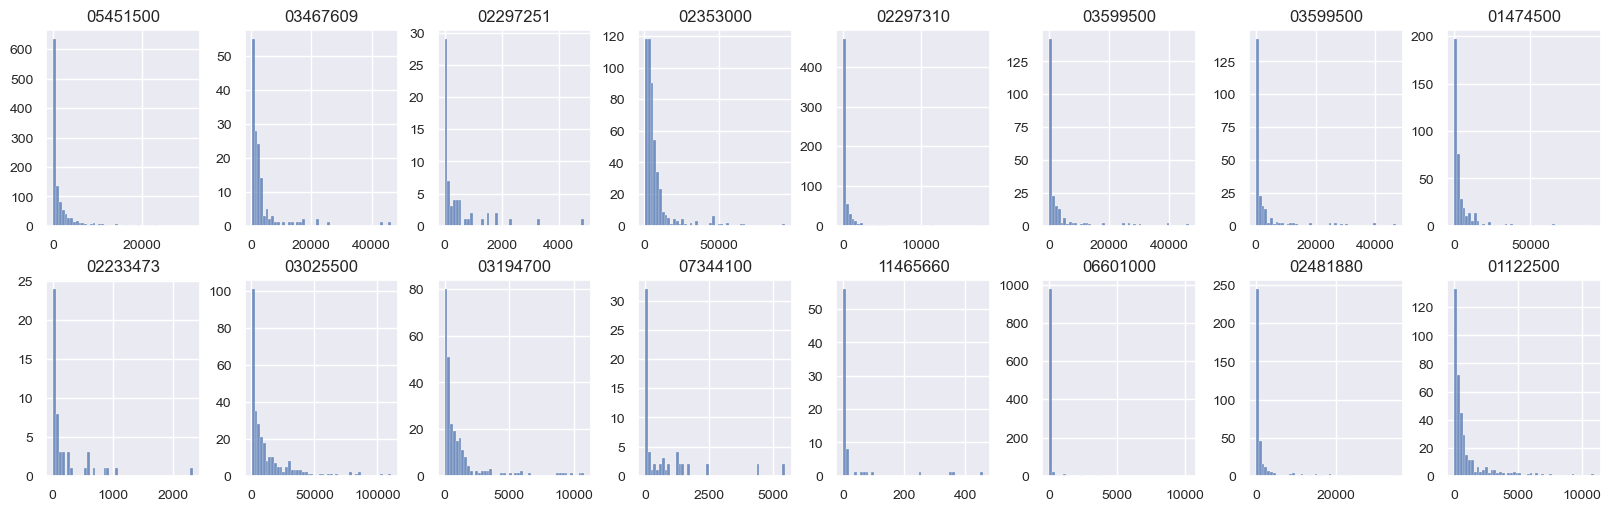

In [23]:
fig, axes = plt.subplots(nrows=2, ncols=8 , figsize=(16, 5), constrained_layout=True)

random_sites = np.random.randint(0, 7098, 16).tolist()
for idx, site_obs in enumerate(tau_pos_freq.iloc[random_sites]):
    usgs_cd = tau_pos_freq.index[tau_pos_freq == site_obs].values[0]
    usgs_nm = tauraat[tauraat['site_no'] == usgs_cd].iloc[0]['station_nm']
    usgs_tp = tauraat[tauraat['site_no'] == usgs_cd].iloc[0]['site_tp_cd']

    i, j = divmod(idx, 8)
    df_plt = tauraat[tauraat["site_no"] == usgs_cd]

    # sns.histplot(x=df_plt['chan_width'], bins=50, ax=axes[i, j])
    sns.histplot(x=df_plt['discharge_va'], bins=50, ax=axes[i, j])
    axes[i, j].set_title(f"{usgs_cd}")
    axes[i, j].set_xlabel('')
    axes[i, j].tick_params(axis='x', labelsize=10)
    axes[i, j].set_ylabel('')
    axes[i, j].tick_params(axis='y', labelsize=10)

plt.savefig('./data/tau_discharge_dist.png')
# plt.subplots_adjust(hspace=0.3) # (left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)
plt.show()

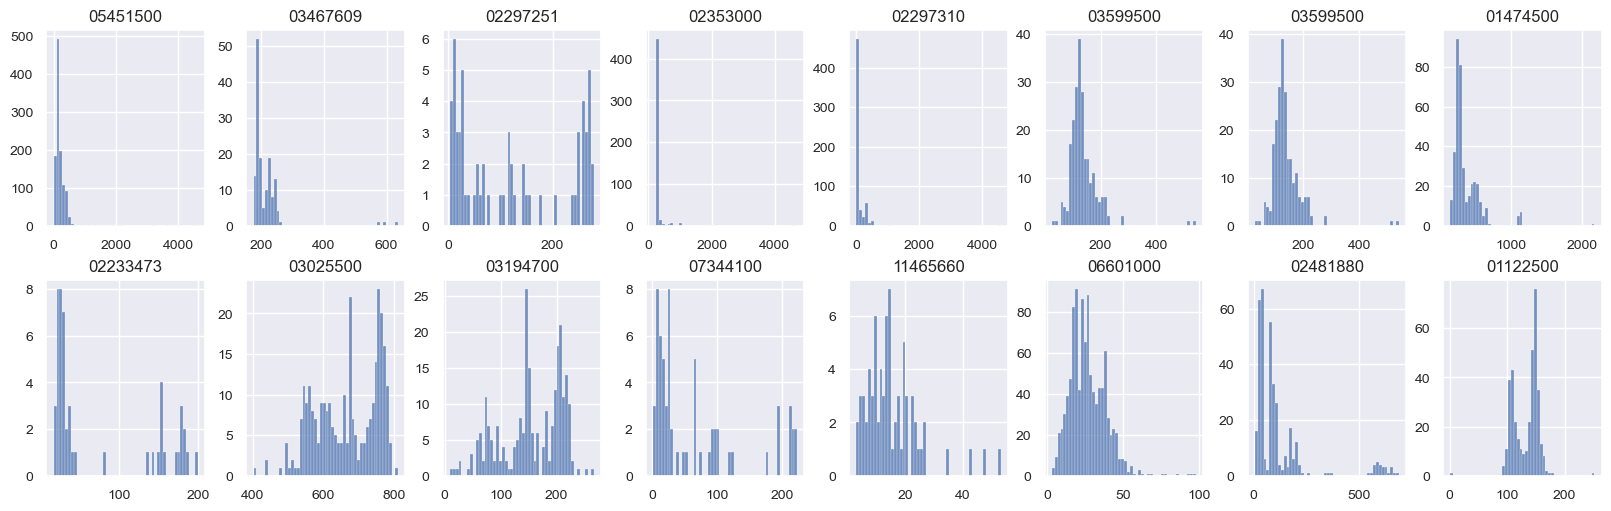

In [24]:
fig, axes = plt.subplots(nrows=2, ncols=8 , figsize=(16, 5), constrained_layout=True)

for idx, site_obs in enumerate(tau_pos_freq.iloc[random_sites]):
    usgs_cd = tau_pos_freq.index[tau_pos_freq == site_obs].values[0]
    usgs_nm = tauraat[tauraat['site_no'] == usgs_cd].iloc[0]['station_nm']
    usgs_tp = tauraat[tauraat['site_no'] == usgs_cd].iloc[0]['site_tp_cd']

    i, j = divmod(idx, 8)
    df_plt = tauraat[tauraat["site_no"] == usgs_cd]

    sns.histplot(x=df_plt['chan_width'], bins=50, ax=axes[i, j])
    # sns.histplot(x=df_plt['discharge_va'], bins=50, ax=axes[i, j])
    axes[i, j].set_title(f"{usgs_cd}")
    axes[i, j].set_xlabel('')
    axes[i, j].tick_params(axis='x', labelsize=10)
    axes[i, j].set_ylabel('')
    axes[i, j].tick_params(axis='y', labelsize=10)

plt.savefig('./data/tau_width_dist.png')
# plt.subplots_adjust(hspace=0.3) # (left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)
plt.show()

# Find the Best Distribution for Discharge

In [ ]:
best_fit_lst = []
for idx, (site, group) in enumerate(tauraat.groupby('site_no')):

    f = Fitter(group['discharge_va'].values, distributions= get_common_distributions())
    print(idx, site, f.fit())
    # f.summary(); break
    best_fit_dict = f.get_best(method='sumsquare_error')
    best_fit_lst.append([site, best_fit_dict])

In [37]:
with open('./data/fit_dist_discharge.txt', 'w') as fp:
    for item in best_fit_lst:
        # write each item on a new line
        fp.write("%s\n" % item)
    print('Done')

Done


In [38]:
best_fit_names = [list(item.keys())[0] for item in best_fit_lst]
df = pd.DataFrame({'freq': best_fit_names})
df = df.groupby('freq', as_index=False).size()
df

,freq,size
0,cauchy,2247
1,chi2,150
2,expon,395
3,exponpow,110
4,gamma,381
5,lognorm,3679
6,norm,48
7,powerlaw,37
8,rayleigh,45
9,uniform,6


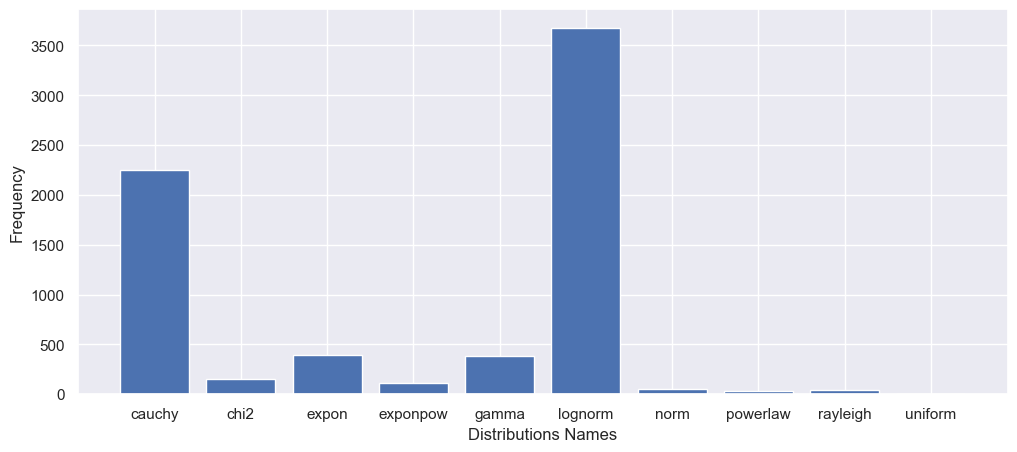

In [40]:
fig, ax = plt.subplots(figsize=(12,5))

ax.bar(df['freq'], df['size'])
ax.set_xlabel('Distributions Names')
ax.set_ylabel('Frequency')

plt.savefig('./data/dist_freq_discharge.png')
plt.show()